In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

#Cargo los archivos desde el directorio "../input/"

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Los muestro por salida estandar

import warnings
warnings.filterwarnings('ignore')
print("No se muestran Warning")
#warnings.filterwarnings('always')
#print("\nSe muestran Warning")

../input\aisles.csv
../input\departments.csv
../input\kaggle_instakart_jcv.db
../input\orders.csv
../input\order_products__prior.csv
../input\order_products__train.csv
../input\products.csv
No se muestran Warning


In [2]:
#Cargo los archivos en dataframes

aisles = pd.read_csv('../input/aisles.csv')
departments = pd.read_csv('../input/departments.csv')
products = pd.read_csv('../input/products.csv')
orders = pd.read_csv('../input/orders.csv')

order_products_prior = pd.read_csv('../input/order_products__prior.csv')
order_products_train = pd.read_csv('../input/order_products__train.csv')

print("Listo!")

Listo!


## Preprocesamiento de datos

### Relleno de valores faltantes

In [3]:
# Chequeo de valores perdidos
print("="*10 + "aisles.csv" + "="*10)
print(aisles.isnull().sum(axis = 0))
print()

print("="*10 + "departments.csv" + "="*10)
print(departments.isnull().sum(axis = 0))
print()

print("="*10 + "order_products__prior.csv" + "="*10)
print(order_products_prior.isnull().sum(axis = 0))
print()

print("="*10 + "order_products__train.csv" + "="*10)
print(order_products_train.isnull().sum(axis = 0))
print()

print("="*10 + "orders.csv" + "="*10)
print(orders.isnull().sum(axis = 0))
print()

print("="*10 + "products.csv" + "="*10)
print(products.isnull().sum(axis = 0))
print()

==========aisles.csv==========
aisle_id    0
aisle       0
dtype: int64

==========departments.csv==========
department_id    0
department       0
dtype: int64

==========order_products__prior.csv==========
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

==========order_products__train.csv==========
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

==========orders.csv==========
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

==========products.csv==========
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64



% de datos que tienen valores faltantes 
order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64

% de usuarios únicos vs datos totales: 0.06027594185817766


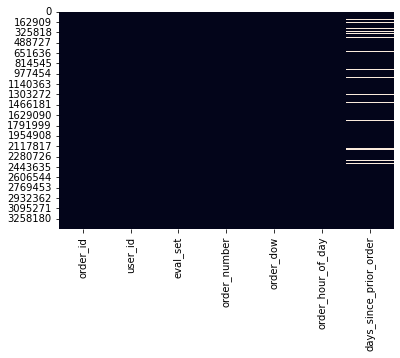

In [4]:
# Encontrar valores faltantes en orders.csv

import seaborn as sns

# Identificamos los valores perdidos visualmente
sns.heatmap(orders.isnull(), cbar=False)

print("% de datos que tienen valores faltantes ")
print(orders.isnull().sum()/orders.shape[0])

print("\n% de usuarios únicos vs datos totales:",orders.user_id.nunique()/len(orders))

In [5]:
#compruebo si los valores nulos están presentes solo para los primeros pedidos de todos los usuarios
orders[orders['order_number']==1].isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

__conclusión__:

Para el primer pedido de cada usuario, days_since_prior_order se deja vacío.
Es seguro reemplazar con 0 aquí.

In [6]:
# Reemplazamos
orders.fillna(value = 0, inplace = True)

In [7]:
print("% de datos que tienen valores faltantes ")
print(orders.isnull().sum()/orders.shape[0])

% de datos que tienen valores faltantes 
order_id                  0.0
user_id                   0.0
eval_set                  0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64


### Datos combinados

Primero, crearé una tabla de "productos combinados", que será una combinación de departamento, pasillo y productos, así que tengo
toda la información de los productos en una tabla.

In [8]:
productscombined = pd.merge(products, aisles, on='aisle_id')
productscombined = pd.merge(productscombined, departments, on='department_id')
productscombined

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


En segundo lugar, crearé una tabla orderscombined que será una combinación de order_products_prior y orders.

In [9]:
orderscombined1 = pd.merge(orders, order_products_prior , on='order_id')
orderscombined1


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,0.0,196,1,0
1,2539329,1,prior,1,2,8,0.0,14084,2,0
2,2539329,1,prior,1,2,8,0.0,12427,3,0
3,2539329,1,prior,1,2,8,0.0,26088,4,0
4,2539329,1,prior,1,2,8,0.0,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0


In [10]:
#Combinar pedidos y el dataframe order_products__train

orderscombined2 = pd.merge(orders,order_products_train , on='order_id')
orderscombined2


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1
...,...,...,...,...,...,...,...,...,...,...
1384612,272231,206209,train,14,6,14,30.0,40603,4,0
1384613,272231,206209,train,14,6,14,30.0,15655,5,0
1384614,272231,206209,train,14,6,14,30.0,42606,6,0
1384615,272231,206209,train,14,6,14,30.0,37966,7,0


Ahora, fusionaré datos de ambas tablas combinadas para un análisis exploratorio.

Primero, fusionaré la tabla productscombined y orderscombined1 (que contiene pedidos anteriores) nombré esta tabla prioralldata

Segundo, fusionaré la tabla productscombined y la ordercombined2 (que contiene órdenes de entrenamiento) nombré esta tabla trainalldata

In [11]:
prioralldata = pd.merge(orderscombined1, productscombined , on='product_id')
prioralldata

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,1320836,202557,prior,17,2,15,1.0,43553,2,1,Orange Energy Shots,64,7,energy sports drinks,beverages
32434485,31526,202557,prior,18,5,11,3.0,43553,2,1,Orange Energy Shots,64,7,energy sports drinks,beverages
32434486,758936,203436,prior,1,2,7,0.0,42338,4,0,"Zucchini Chips, Pesto",50,19,fruit vegetable snacks,snacks
32434487,2745165,203436,prior,2,3,5,15.0,42338,16,1,"Zucchini Chips, Pesto",50,19,fruit vegetable snacks,snacks


In [12]:
trainalldata = pd.merge(orderscombined2, productscombined, on='product_id')
trainalldata

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,soft drinks,beverages
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,soft drinks,beverages
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,soft drinks,beverages
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,soft drinks,beverages
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,soft drinks,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384612,3351563,206110,train,5,3,13,7.0,22165,22,0,Chewy Reduced Sugar Granola Bars Variety Pack,48,14,breakfast bars pastries,breakfast
1384613,2629221,206125,train,14,6,13,30.0,31540,5,0,Plain Flavor Probiotic Acidophilus,70,11,digestion,personal care
1384614,2721635,206149,train,6,6,10,30.0,44507,2,1,"100% Juice, Rio Red Grapefruit",98,7,juice nectars,beverages
1384615,2078948,206155,train,15,3,11,15.0,47814,1,1,Puppy Complete Nutrition Chicken & Beef Dinner...,40,8,dog food care,pets


## Analisis grafico

In [13]:
pedidos = orders.loc[:, ['order_id','order_dow','days_since_prior_order','order_hour_of_day']]
#pedidos


#dataset para entrenamiento
priorall = prioralldata.loc[:,['order_id','order_dow','days_since_prior_order',\
                                    'order_hour_of_day', 'order_number', 'add_to_cart_order',\
                                    'user_id','product_id','product_name','department',\
                                    'aisle','reordered']]
#priorall

#dataset final de testing
df_mascara = orders['eval_set']=='test'
filtrado_test = orders[df_mascara]
testdata = filtrado_test.loc[:,['order_id','order_dow','days_since_prior_order',\
    'order_hour_of_day','order_number']]


trainall = trainalldata.loc[:,['order_id', 'order_dow', 'days_since_prior_order',\
                                    'order_hour_of_day', 'product_id', 'product_name',\
                                    'department', 'aisle', 'reordered']]
#trainall

#creo 3 contadores count_by_prod, count_by_isle, count_by_dep

tmp_1 = pd.DataFrame(priorall.groupby(['product_name']).agg({'order_id':pd.Series.nunique})
                         .rename(columns={'order_id':'count_prod'})).reset_index()


tmp_2 = pd.DataFrame(priorall.groupby(['department']).agg({'order_id':pd.Series.nunique})
                         .rename(columns={'order_id':'count_dep'})).reset_index()


tmp_3 = pd.DataFrame(priorall.groupby(['aisle']).agg({'order_id':pd.Series.nunique})
                         .rename(columns={'order_id':'count_aisle'})).reset_index()

In [14]:
testdata

,order_id,order_dow,days_since_prior_order,order_hour_of_day,order_number
38,2774568,5,11.0,15,13
44,329954,3,30.0,12,6
53,1528013,3,22.0,16,4
96,1376945,6,8.0,11,8
102,1356845,1,30.0,20,6
...,...,...,...,...,...
3420918,2728930,2,6.0,17,23
3420929,350108,4,14.0,14,5
3421001,1043943,0,0.0,20,68
3421018,2821651,2,14.0,13,17


In [15]:
priorall.head()

,order_id,order_dow,days_since_prior_order,order_hour_of_day,order_number,add_to_cart_order,user_id,product_id,product_name,department,aisle,reordered
0,2539329,2,0.0,8,1,1,1,196,Soda,beverages,soft drinks,0
1,2398795,3,15.0,7,2,1,1,196,Soda,beverages,soft drinks,1
2,473747,3,21.0,12,3,1,1,196,Soda,beverages,soft drinks,1
3,2254736,4,29.0,7,4,1,1,196,Soda,beverages,soft drinks,1
4,431534,4,28.0,15,5,1,1,196,Soda,beverages,soft drinks,1


In [16]:
#Creo los 10 productos más populares de todos los product_name, dentro del departamento, dentro del pasillo
top_10_prod = tmp_1.nlargest(10,'count_prod')['product_name']
top_10_dep = tmp_2.nlargest(10,'count_dep')['department']
top_10_aisle = tmp_3.nlargest(10,'count_aisle')['aisle']

tmp_4= priorall[priorall['product_name'].isin(top_10_prod)]
tmp_5= priorall[priorall['department'].isin(top_10_dep)]
tmp_6= priorall[priorall['aisle'].isin(top_10_aisle)]

In [17]:
priorall.head()

,order_id,order_dow,days_since_prior_order,order_hour_of_day,order_number,add_to_cart_order,user_id,product_id,product_name,department,aisle,reordered
0,2539329,2,0.0,8,1,1,1,196,Soda,beverages,soft drinks,0
1,2398795,3,15.0,7,2,1,1,196,Soda,beverages,soft drinks,1
2,473747,3,21.0,12,3,1,1,196,Soda,beverages,soft drinks,1
3,2254736,4,29.0,7,4,1,1,196,Soda,beverages,soft drinks,1
4,431534,4,28.0,15,5,1,1,196,Soda,beverages,soft drinks,1


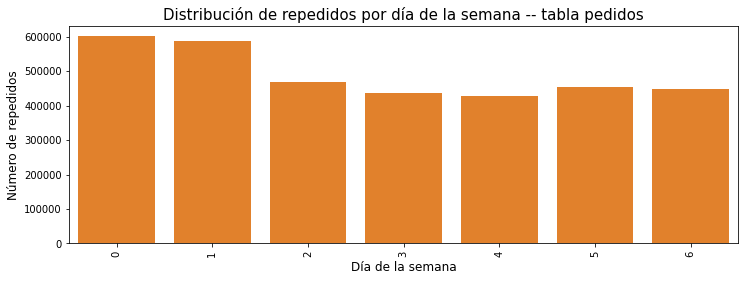

In [18]:
#Ahora puedo comenzar a graficar
plt.figure(figsize=(12,4))
sns.countplot(x="order_dow",  data=orders,color=color[1])   
plt.ylabel('Número de repedidos', fontsize=12)
plt.xlabel('Día de la semana', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribución de repedidos por día de la semana -- tabla pedidos", fontsize=15)
plt.show()

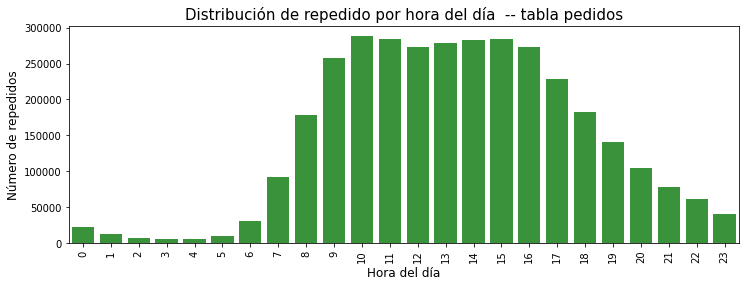

In [19]:
plt.figure(figsize=(12,4))
sns.countplot(x="order_hour_of_day",  data=orders,color=color[2])   
plt.ylabel('Número de repedidos', fontsize=12)
plt.xlabel('Hora del día', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribución de repedido por hora del día  -- tabla pedidos", fontsize=15)
plt.show()

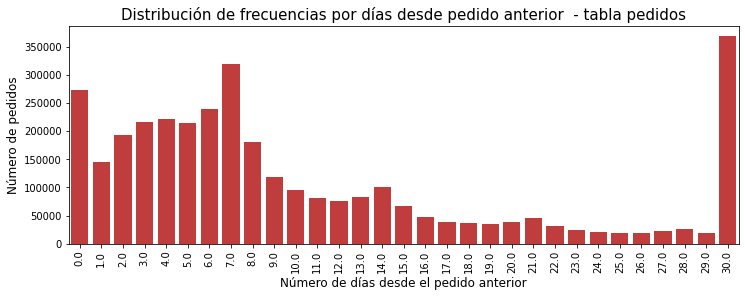

In [20]:
plt.figure(figsize=(12,4))
sns.countplot(x='days_since_prior_order', data=orders, color=color[3])
plt.ylabel('Número de pedidos', fontsize=12)
plt.xlabel('Número de días desde el pedido anterior', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribución de frecuencias por días desde pedido anterior  - tabla pedidos", fontsize=15)
plt.show()

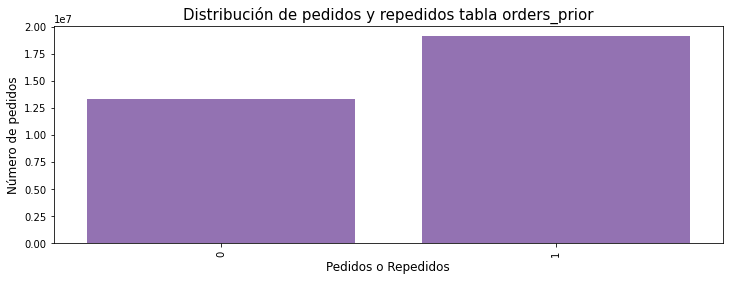

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x="reordered", data=priorall, color=color[4])
plt.ylabel('Número de pedidos', fontsize=12)
plt.xlabel('Pedidos o Repedidos', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribución de pedidos y repedidos tabla orders_prior", fontsize=15)
plt.show()

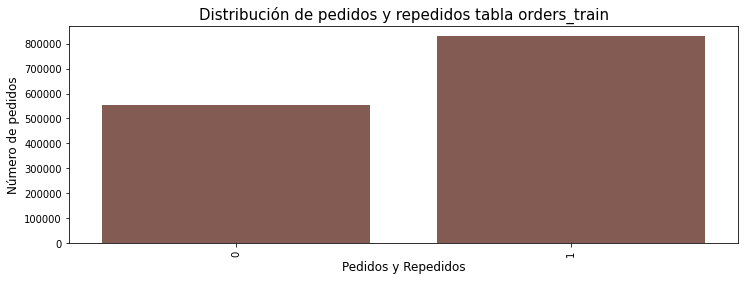

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(x="reordered", data=trainall, color=color[5])
plt.ylabel('Número de pedidos', fontsize=12)
plt.xlabel('Pedidos y Repedidos', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribución de pedidos y repedidos tabla orders_train", fontsize=15)
plt.show()

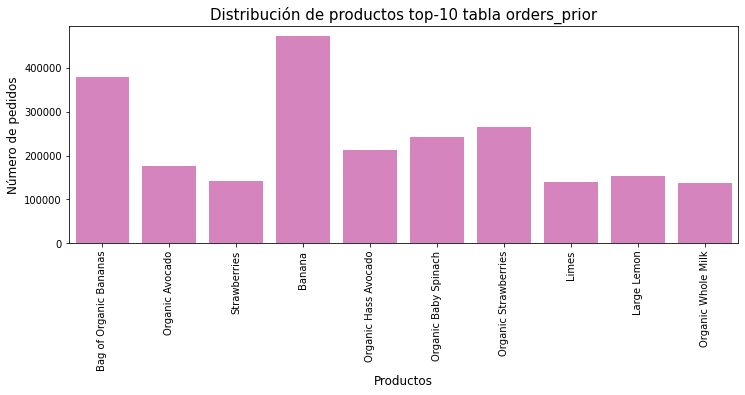

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(x="product_name",data=tmp_4, color=color[6])
plt.ylabel('Número de pedidos', fontsize=12)
plt.xlabel('Productos', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribución de productos top-10 tabla orders_prior", fontsize=15)
plt.show()

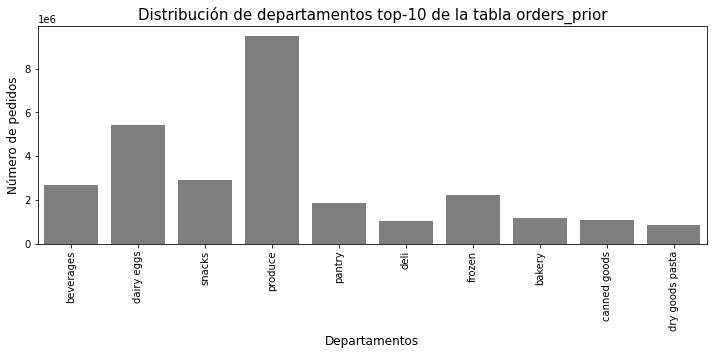

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(x="department", data=tmp_5,color=color[7])
plt.ylabel('Número de pedidos', fontsize=12)
plt.xlabel('Departamentos', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribución de departamentos top-10 de la tabla orders_prior", fontsize=15)
plt.show()

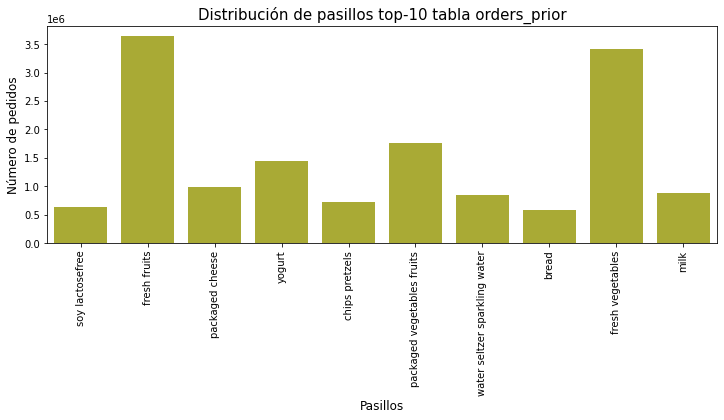

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(x="aisle", data=tmp_6,color=color[8])
plt.ylabel('Número de pedidos', fontsize=12)
plt.xlabel('Pasillos', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Distribución de pasillos top-10 tabla orders_prior", fontsize=15)
plt.show()

## Distribución de pedidos en diferentes días de la semana por hora

Text(0.5, 6.800000000000189, 'Hora del día')

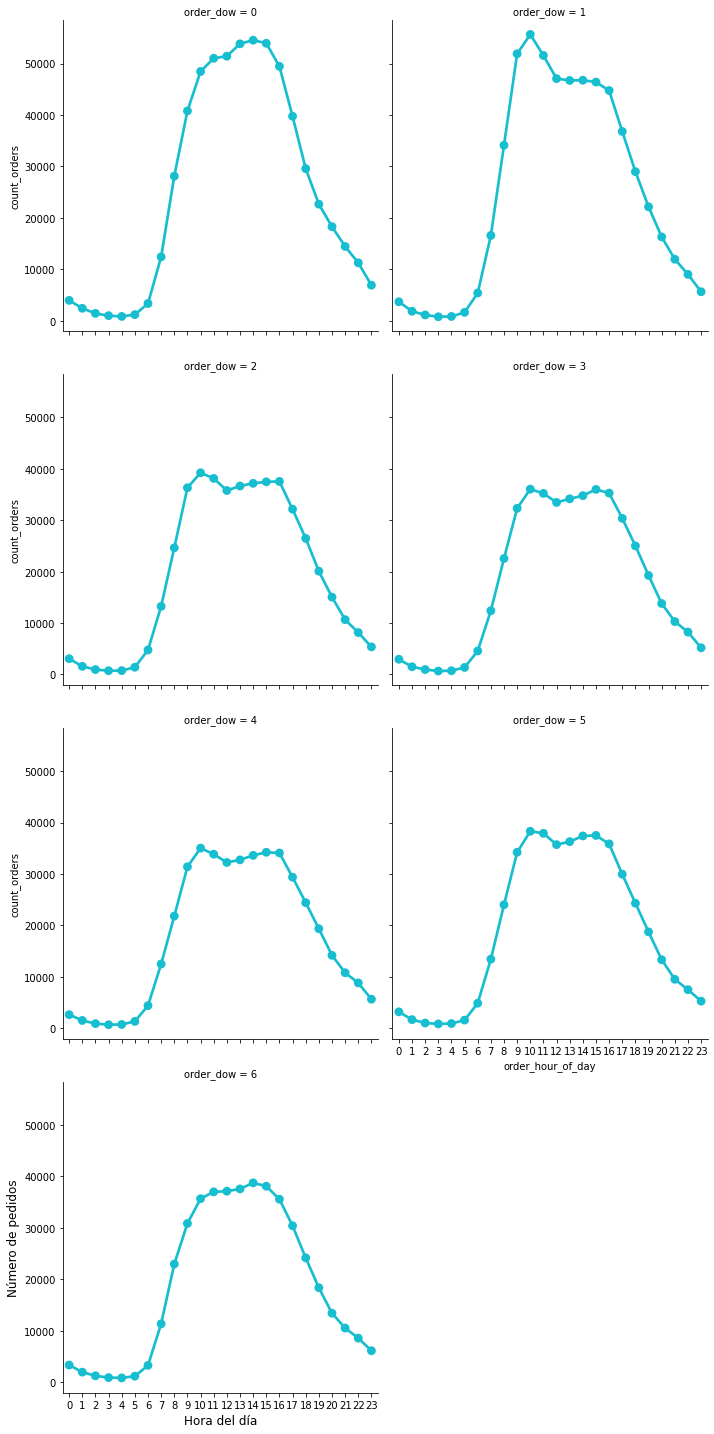

In [26]:
tmp_7 = pd.DataFrame(orders.groupby(['order_dow','order_hour_of_day'])
                          .agg({'order_id':pd.Series.nunique})
                          .rename(columns={'order_id':'count_orders'})).reset_index()
plt.close('all')
sns.factorplot(x="order_hour_of_day", y="count_orders",
               col="order_dow", data=tmp_7, color=color[9],col_wrap=2,size=5);

plt.ylabel('Número de pedidos', fontsize=12)
plt.xlabel('Hora del día', fontsize=12)
#del tmp_1

## Investigación más detallada de los productos pedidos los sábados y domingos (días de la semana 0 y 1)

Text(0.5, 6.79999999999999, 'Hora del día')

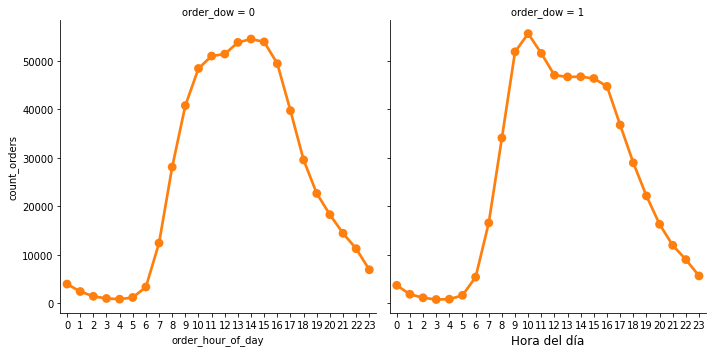

In [27]:
pedidos_finde = orders.query("order_dow ==0 | order_dow ==1")
orders_weekend = pedidos_finde.loc[:,['order_id', 'order_dow', 'days_since_prior_order', 'order_hour_of_day']]
#orders_weekend

tmp_wend = pd.DataFrame(orders_weekend.groupby(['order_dow','order_hour_of_day'])
                          .agg({'order_id':pd.Series.nunique})
                          .rename(columns={'order_id':'count_orders'})).reset_index()

plt.close('all')
sns.factorplot(x="order_hour_of_day", y="count_orders",
               col="order_dow", data=tmp_wend, color=color[1],col_wrap=2,size=5);

plt.ylabel('Número de pedidos', fontsize=12)
plt.xlabel('Hora del día', fontsize=12)

El número de pedidos del sábado aumenta constantemente desde las 9 am y cae bruscamente después de las 4 pm. 

El domingo la imagen es un poco diferente, el número de pedidos alcanza su punto máximo a las 10 am y disminuye ligeramente cada hora hasta las 5 pm.

Veamos qué productos son las compras más populares durante el fin de semana (según la tabla orders_prior).

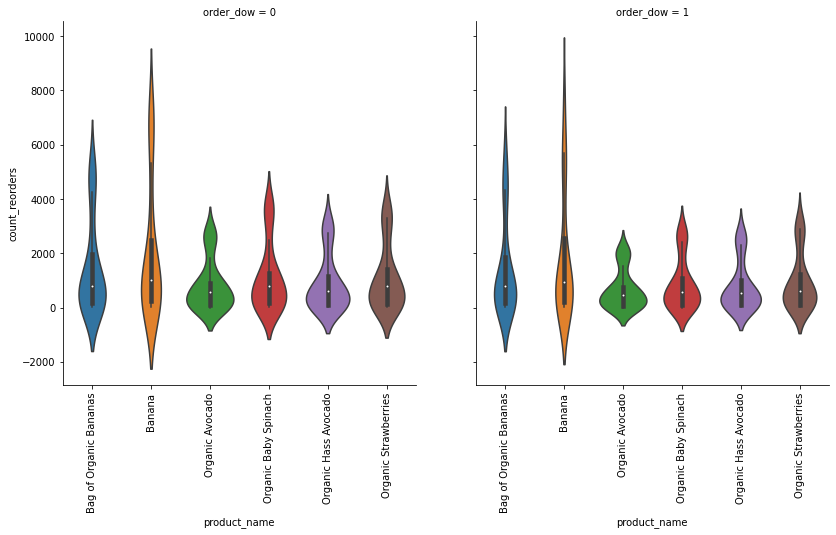

In [28]:

pedidos_finde = prioralldata.query("order_dow ==0 | order_dow ==1")   

mergeall_weekend = pedidos_finde.loc[:,['order_id', 'order_dow', 'days_since_prior_order', \
    'order_hour_of_day','product_id', 'product_name','department', 'aisle','reordered']]

#mergeall_weekend
tmp_1_groupby= mergeall_weekend.groupby(['order_dow','order_hour_of_day','product_name',
                                         'reordered']).agg({'order_id':
                                                            pd.Series.nunique}).rename(columns={'order_id':
                                                                                                'count_reorders'})
tmp_2_groupby = tmp_1_groupby['count_reorders'].groupby(level=0, group_keys=False)

tmp_8 = pd.DataFrame(tmp_1_groupby).reset_index()
tmp_9 = pd.DataFrame(tmp_2_groupby.nlargest(50)).reset_index()

top10_dayandtime = tmp_9[tmp_9['reordered']==1]

#Limite los datos para solo a aquellos productos que se encuentran en la categoría de los 10 
# principales en cualquier combinación de hora y día
tmp_8 = tmp_8[tmp_8['product_name'].isin(top10_dayandtime['product_name'])]

#La mayoría de los pedidos son entre 6 y 20
#temp_df_01 = temp_df_01[(temp_df_01['order_hour_of_day'] >= 6) & (temp_df_01['order_hour_of_day'] <= 20) ]

plt.close('all')
g = sns.factorplot(x='product_name', y='count_reorders',
                   #col="day_of_week", data=temp_df_01[temp_df_01['reordered']==1], kind="swarm",col_wrap=3,size=5);
                   col="order_dow", data=tmp_8, kind="violin",col_wrap=2,size=6);
g.set_xticklabels(rotation=90)

Por lo tanto, los productos más buscados en el fin de semana son frutas y verduras, y casi todos los productos orgánicos.